Q3.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
try:
    data = pd.read_csv('./coronavirus_tweets.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        print('Unidecodecode error 1, encoding with latin1')
        data = pd.read_csv('./coronavirus_tweets.csv', encoding='latin1')
    except UnicodeDecodeError:
        print('Unicodedecode error 2, encoding with ISO')
        data = pd.read_csv('./coronavirus_tweets.csv', encoding='ISO-8859-1')
data

Unidecodecode error 1, encoding with latin1


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


Q3.1. [13 points]

Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64


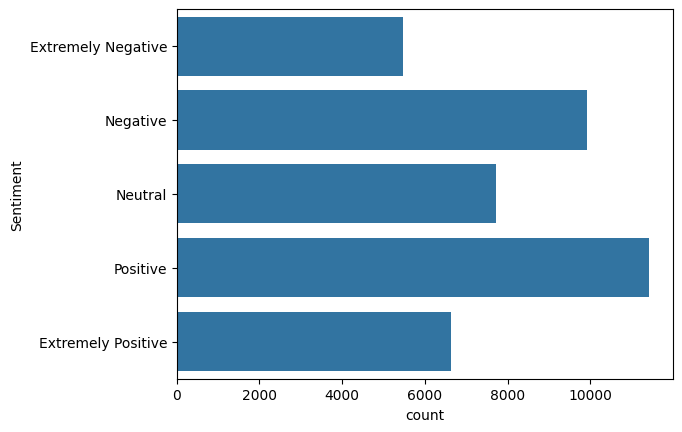

First most popular sentiment: Positive
Second most popular sentiment: Negative
Third most popular sentiment: Neutral
Fourth most popular sentiment: Extremely Positive
Least popular sentiment: Extremely Negative


In [4]:
# List the values of the sentiment column
print(data['Sentiment'].value_counts())

# Plot the sentiment distribution, sorted in order extremly negative, negative, neutral, positive, extremly positive
sentiment_order = ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']
sns.countplot(data['Sentiment'], order=sentiment_order)
plt.show()

print("First most popular sentiment:", data['Sentiment'].value_counts().index[0])
print("Second most popular sentiment:", data['Sentiment'].value_counts().index[1])
print("Third most popular sentiment:", data['Sentiment'].value_counts().index[2])
print("Fourth most popular sentiment:", data['Sentiment'].value_counts().index[3])
print("Least popular sentiment:", data['Sentiment'].value_counts().index[4])

In [5]:
# Date with greatest number of extremely positive tweets
date_extremely_positive = data[data['Sentiment'] == 'Extremely Positive']
print('Most common day for extremely positive tweets:', date_extremely_positive['TweetAt'].value_counts().index[0])
date_positive = data[data['Sentiment'] == 'Positive']
print('Most common day for positive tweets:', date_positive['TweetAt'].value_counts().index[0])
date_neutral = data[data['Sentiment'] == 'Neutral']
print('Most common day for neutral tweets:', date_neutral['TweetAt'].value_counts().index[0])
date_negative = data[data['Sentiment'] == 'Negative']
print('Most common day for negative tweets:', date_negative['TweetAt'].value_counts().index[0])
date_extremely_negative = data[data['Sentiment'] == 'Extremely Negative']
print('Most common day for extremely negative tweets:', date_extremely_negative['TweetAt'].value_counts().index[0])

Most common day for extremely positive tweets: 25-03-2020
Most common day for positive tweets: 20-03-2020
Most common day for neutral tweets: 20-03-2020
Most common day for negative tweets: 20-03-2020
Most common day for extremely negative tweets: 20-03-2020


<Axes: xlabel='TweetAt'>

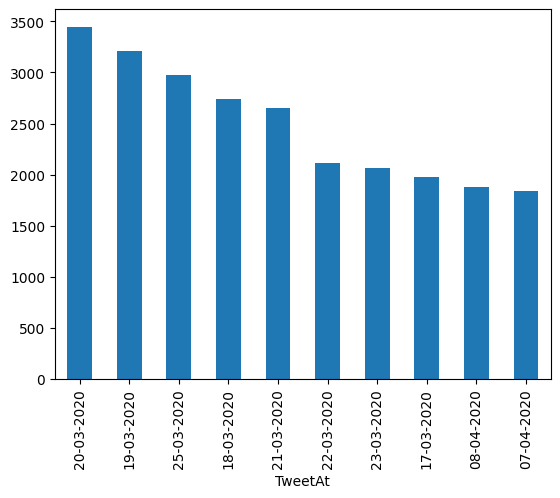

In [6]:
# Number of tweets per day
tweets_per_day = data['TweetAt'].value_counts().sort_index()
# tweets_per_day.plot()

# Top ten common days for tweets plotted on bar graph
data['TweetAt'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='TweetAt'>

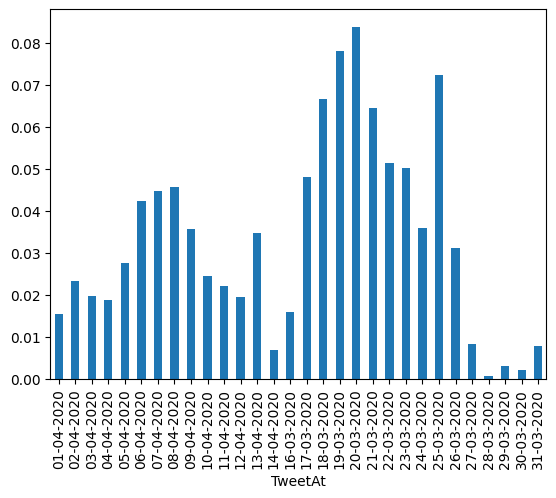

In [7]:
# Normalised daily tweet ratio
tweets_per_day = data['TweetAt'].value_counts(normalize=True).sort_index()
tweets_per_day.plot(kind='bar')

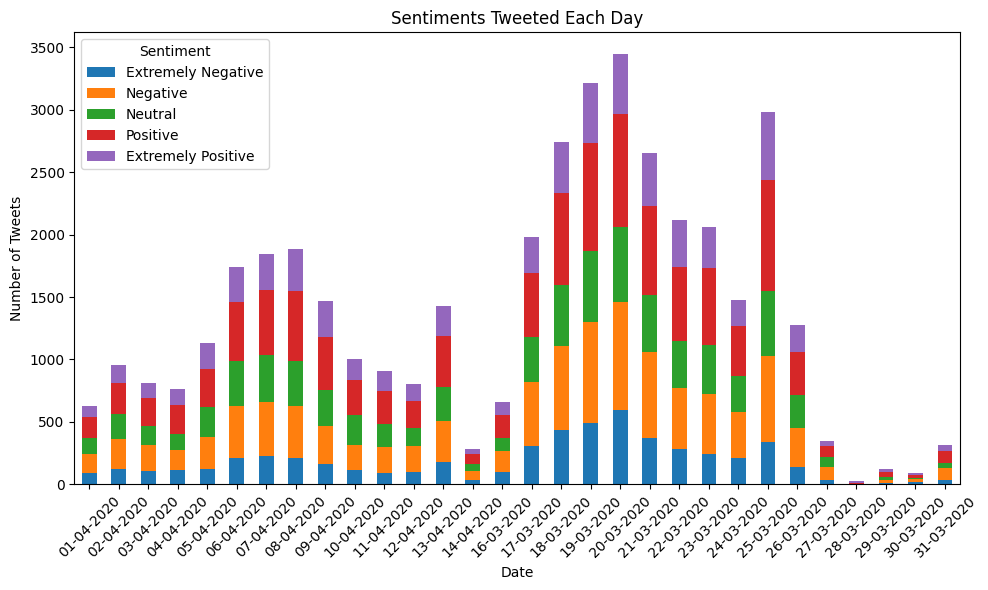

In [8]:
# Number of tweets per day for each sentiment
sentiments_per_day = data.groupby(['TweetAt', 'Sentiment']).size().unstack(fill_value=0).sort_index()
sentiments_per_day = sentiments_per_day[sentiment_order]

sentiments_per_day.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Sentiments Tweeted Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

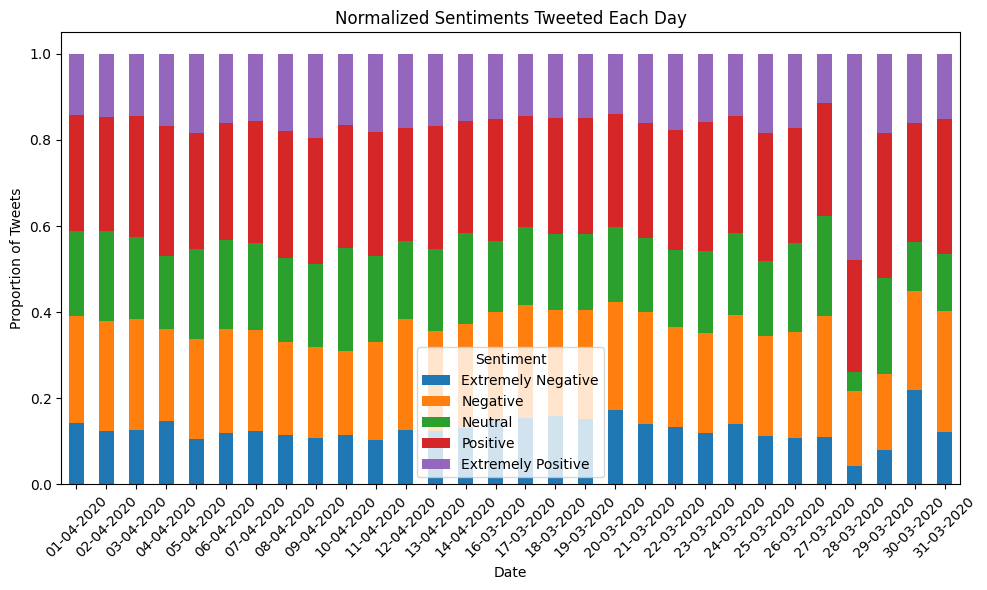

In [9]:
normalized_sentiments_per_day = sentiments_per_day.div(sentiments_per_day.sum(axis=1), axis=0)

normalized_sentiments_per_day.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Sentiments Tweeted Each Day')
plt.xlabel('Date')
plt.ylabel('Proportion of Tweets')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

28th of March was the best day, ceteris paribus. Ever other day is quite predictable, but two days later, 30th of March was worse than all others, though hard to compare as very few tweets on both these days compared to earlier that month. 28th has very little data, and is an outlier.

In [90]:
# Convert text to lowercase
data['OriginalTweet'] = data['OriginalTweet'].str.lower()

# Remove punctuation
data['OriginalTweet'] = data['OriginalTweet'].str.replace('[^\w\s]', ' ')

# Remove leading and trailing whitespace
data['OriginalTweet'] = data['OriginalTweet'].str.strip()

# Make sure each word is separated by a single space
data['OriginalTweet'] = data['OriginalTweet'].str.replace('\s+', ' ', regex=True)

# Set the max_colwidth option to display the full content of 'OriginalTweet' column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

# Checking all data is in desired format manually
# data.to_csv('cleaned_data.csv', index=False)

Q3.2. [14 points]

In [91]:
# Combine each tweet into a single string
column_values = data['OriginalTweet'].tolist()
text = ' '.join(column_values)
print("number of words in all tweets:", len(text))
words = text.split()
unique_words = set(words)
print("number of unique words in all tweets:", len(unique_words))

# Count the frequency of each word and display the 10 most common words
word_counts = pd.Series(words).value_counts()
print("\nMost common:\n")
print(word_counts.head(10), "\n\n")
print("Some of the least common:\n")
print(word_counts.tail(10))

number of words in all tweets: 8337357
number of unique words in all tweets: 120814

Most common:

the             44546
to              38190
and             23851
of              21459
a               19205
in              18900
#coronavirus    14935
for             13949
is              12132
are             11239
Name: count, dtype: int64 


Some of the least common:

octane           1
tv+,etc.         1
4-movie          1
xbox,etc.        1
ps4,             1
3-online         1
skipthedishes    1
2-delivery       1
reboot           1
whethe           1
Name: count, dtype: int64


In [92]:
!pip install nltk

# Remove stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oscarmoxon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
stop_words = set(stopwords.words('english'))
print(len(stop_words), "stop words")
print(stop_words)
nostop_words = [word for word in words if word not in stop_words]
print("Number of words in all tweets after removing stop words:", len(nostop_words))

print(len(words))
print(len(words) - len(nostop_words))
print("Reduced by", ((len(words) - len(nostop_words)) / len(words) * 100), "%")

print("")

# Remove words with less than 3 characters
noshort_words = [word for word in nostop_words if len(word) >= 3]
short_words = [word for word in nostop_words if len(word) <= 3]
print(short_words)
print("Number of words in all tweets after removing short words:", len(short_words))
print(len(nostop_words) - len(noshort_words))
print("Reduced by", ((len(nostop_words) - len(noshort_words)) / len(noshort_words) * 100), "%")

179 stop words
{'he', "don't", 'at', 'needn', 'you', "it's", 'so', 'very', 'be', 'has', 'i', 'shouldn', "hasn't", 'been', 'these', 'if', 'some', 'above', 'not', 'whom', 'we', 'with', 'now', 've', "isn't", 'are', 'those', 'once', 'can', "haven't", 'will', 'their', 'myself', 'your', 'for', "mightn't", 'they', 'as', 'll', 'am', 'here', 'an', 'our', 'being', 'doesn', 'and', 'where', "you'll", 'shan', 'is', 'wouldn', 'its', 's', "should've", 'weren', 'between', "needn't", 'hers', 'into', 'm', 'the', 'ain', 're', 'from', 'were', 'me', "doesn't", 'themselves', 'such', "hadn't", 'then', 'more', 'hasn', 'yourselves', 'out', 'have', 'when', 'does', 'too', 'in', "couldn't", 'few', 'what', "you've", 'same', 'wasn', 'won', "wouldn't", 'it', 'himself', 'or', 'before', 'against', "shan't", 'further', 't', 'had', 'no', 'under', 'couldn', 'having', 'do', 'most', 'but', 'below', 'ourselves', 'haven', 'until', 'there', 'through', 'she', "mustn't", "she's", 'any', 'than', "you'd", 'a', "shouldn't", 'their

In [94]:
# Reduce each word to its stem
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in noshort_words]

In [95]:
type(stemmed_words)
print("Number of words in all tweets after stemming:", len(stemmed_words))

# Count the frequency of each word and display the 10 most common words
stemmed_word_counts = pd.Series(stemmed_words).value_counts()
print(stemmed_word_counts)

Number of words in all tweets after stemming: 773910
#coronaviru               14940
price                      7678
store                      6660
groceri                    6333
supermarket                6243
                          ...  
blackwel                      1
primark,                      1
timpsons,                     1
https://t.co/xdik0e4l3        1
wheth                         1
Name: count, Length: 109846, dtype: int64


In [97]:
print("\nMost common:\n")
print(stemmed_word_counts.head(10), "\n\n")


Most common:

#coronaviru    14940
price           7678
store           6660
groceri         6333
supermarket     6243
food            6090
covid-19        5518
peopl           5079
consum          4700
#covid19        4635
Name: count, dtype: int64 


